## Speed Dating and the 6 Traits

We have data on an speed dating survey from 2004. Each round had an equal number of males and females, and every man met with every woman and there is data on hundreds of rounds in our dataset. Before the start of the each round, each particant was surveyed on the importance of certain traits in a partner and at the end, each particant ranked their 'dates' based on these same traits.

The 6 traits they surveyed each particant on were how __attractive__, __sincere__, __intelligent__, __fun__, and __ambitious__ their 'dates' were as well as how many __shared interests__ they had with their 'dates'. Let's also take this time to define some terms we will be using. A __subject__ is the person who is speed dating and their __partners__ will be one of their speed dates.

Because of the nature of this data, we can assume that the self-reported data is reliable (put later?)

Let's inspect our data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from collections import Counter
from IPython.core.display import HTML

%matplotlib inline

In [2]:
from subprocess import check_output
dating = pd.read_csv("C:\Code\Data\speeddating.csv", encoding="ISO-8859-1")

print(dating.shape)
display(dating.head())

(8378, 195)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


The data has many columns filled with null values. This is because there were many supplimentary survey questions which were not consistently administered, thus they have inconsistent data. Fortunately, most of the data for the questions we will be focusing on is intact, and we can drop any nulls.

Let's visualize some of our data.

In [3]:
# Total Sample Subsets
#what people rated their dates
tsr = dating[['attr','sinc','intel','fun','amb','shar','gender','dec']].dropna()
tsr.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Gender','Decision']
tsr.Gender[tsr['Gender']==0] = 'Female'
tsr.Gender[tsr['Gender']==1] = 'Male'
#what people want in a partner
tsw = dating[['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1','gender']].dropna()
tsw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Gender']
tsw.Gender[tsw['Gender']==0] = 'Female'
tsw.Gender[tsw['Gender']==1] = 'Male'
#What people think others of the same sex want in a partner
tsfw = dating[['attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1','gender']].dropna()
tsfw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Gender']
tsfw.Gender[tsfw['Gender']==0] = 'Female'
tsfw.Gender[tsfw['Gender']==1] = 'Male'
#what people think the opposite sex want in a partner
tsmw = dating[['attr2_1','sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1','gender']].dropna()
tsmw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Gender']
tsmw.Gender[tsmw['Gender']==0] = 'Female'
tsmw.Gender[tsmw['Gender']==1] = 'Male'
#What people's dates rated them
tpr = dating[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','gender','dec_o']].dropna()
tpr.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Gender','Partner Decision']
tpr.Gender[tpr['Gender']==0] = 'Female'
tpr.Gender[tpr['Gender']==1] = 'Male'
#What people's dates wanted in a partner
tpw = dating[['pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','gender']].dropna()
tpw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Gender']
tpw.Gender[tpw['Gender']==0] = 'Female'
tpw.Gender[tpw['Gender']==1] = 'Male'

# Female Only Subsets
dating_f = dating[dating['gender']==0]
#what women rated their dates
fsr = dating_f[['attr','sinc','intel','fun','amb','shar','dec']].dropna()
fsr.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Decision']
#what women want in a partner
fsw = dating_f[['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].dropna()
fsw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']
#What women think other women want in a partner
fsfw = dating_f[['attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1']].dropna()
fsfw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']
#what women think men want in a partner
fsmw = dating_f[['attr2_1','sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']].dropna()
fsmw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']
#What women's dates rated them
fpr = dating_f[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','dec_o']].dropna()
fpr.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Partner Decision']
#What women's dates wanted in a partner
fpw = dating_f[['pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']].dropna()
fpw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']

# Male Only Subsets
dating_m = dating[dating['gender']==1]
#what men rated their dates
msr = dating_m[['attr','sinc','intel','fun','amb','shar','dec']].dropna()
msr.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Decision']
#what men want in a partner
msw = dating_m[['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].dropna()
msw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']
#What men think other men want in a partner
msfw = dating_m[['attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1']].dropna()
msfw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']
#what men think women want in a partner
msmw = dating_m[['attr2_1','sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']].dropna()
msmw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']
#what men's dates rated them
mpr = dating_m[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','dec_o']].dropna()
mpr.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Partner Decision']
#what men's dates wanted in a partner
mpw = dating_m[['pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']].dropna()
mpw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']

## Importance of Traits

First, let's visualize responses when the subjects were asked to rated the importance of the 6 traits in a potential mate on a scale of 1-100. We will split up the male and female subject data. Interestingly, even though the scale was from 1 to 100, most of the scores across all traits were around 20 or 25.

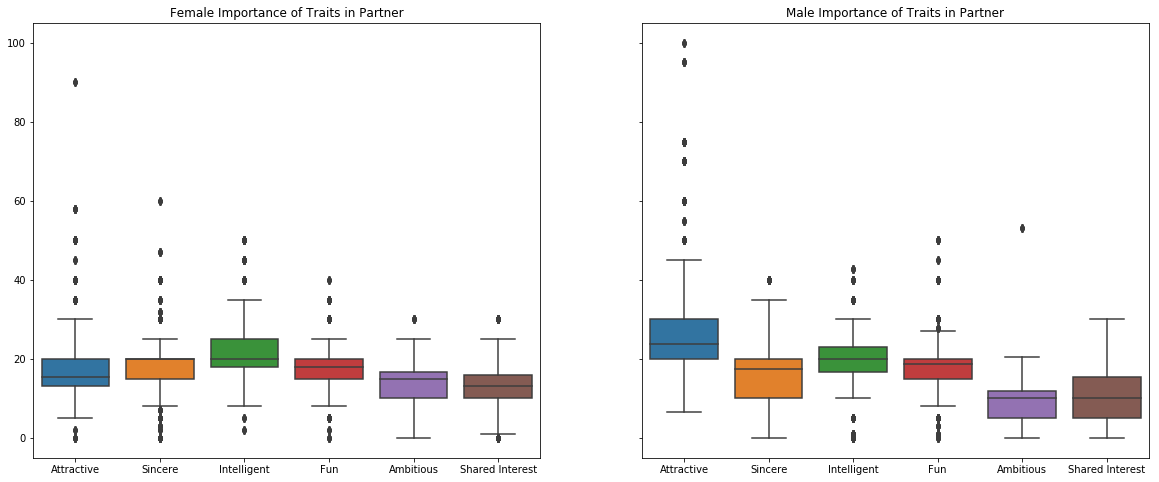

In [4]:
fig, (ax1,ax2) = plt.subplots(figsize=(20,8), ncols=2,  sharey=True)
ax1 = sns.boxplot(data=fsw, ax=ax1)
ax2 = sns.boxplot(data=msw, ax=ax2)
ax1.set_title("Female Importance of Traits in Partner")
ax2.set_title("Male Importance of Traits in Partner")
plt.show()

For women intelligence is first, next looks, fun, and sincerity are about the same, then ambition is fifth, and shared interests with a partner is last.

For men attraction is first, intelligence is second, then sincerity and fun are about equal, then shared interests with a partner is fifth, and ambition is last.

So the sexes rate traits a little differently: men values looks most while women value intelligence most. Also, women seem to want a more well-rounded person, while men seem to have slightly more skewed interest in the 6 traits. At the same time, both sexes have somewhat similar values. Both sexes value looks and intellignece the most and ambition and shared interests last.


Next, let's visualize the responses when subjects were asked to rate how important these 6 traits were to __other__ people of the same sex when looking for a potential mate.

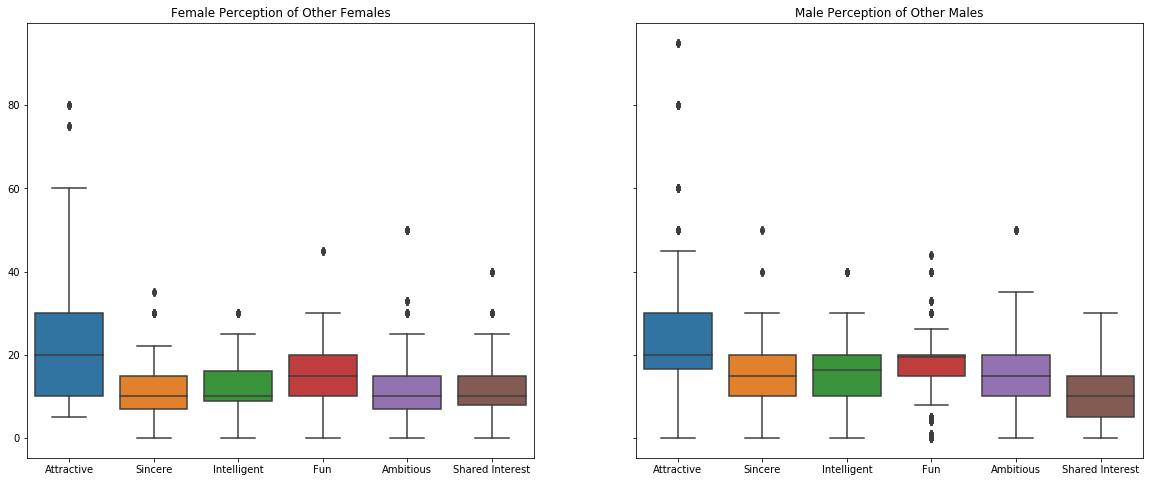

In [5]:
fig, (ax1,ax2) = plt.subplots(figsize=(20,8), ncols=2,  sharey=True)
ax1 = sns.boxplot(data=fsfw, ax=ax1)
ax2 = sns.boxplot(data=msmw, ax=ax2)
ax1.set_title("Female Perception of Other Females")
ax2.set_title("Male Perception of Other Males")
plt.show()

We can see that the responses become much different now. The attraction to a potential mate has become the most important trait by far. Also, the importance of intelligence has been rated lower and fun has been rated higher. When people are asked about their own values they respond more wholistically. but when asked about the values of other they place much more value on looks.

Finally, let's visualize the responses when subjects were asked to rate how important these 6 traits were to __other__ people of the opposite sex when looking for a potential mate.

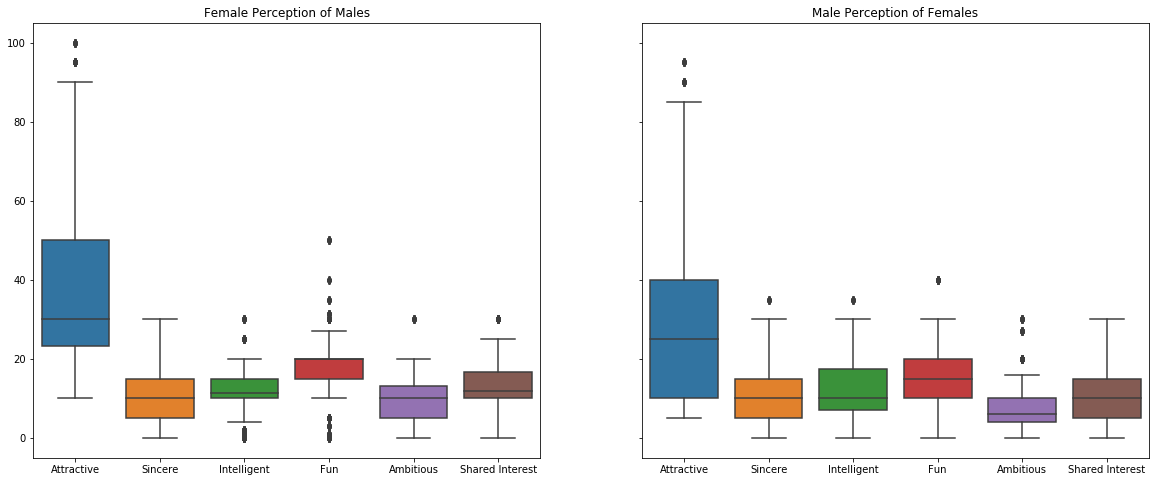

In [6]:
fig, (ax1,ax2) = plt.subplots(figsize=(20,8), ncols=2,  sharey=True)
ax1 = sns.boxplot(data=fsmw, ax=ax1)
ax2 = sns.boxplot(data=msfw, ax=ax2)
ax1.set_title("Female Perception of Males")
ax2.set_title("Male Perception of Females")
plt.show()

Just as before, subjects have rated other people as being more focused on looks than they are. Here, the effect is amplified in both sexes, indicating that people of both sexes assume others of the opposite sex are more shallow than others of the same sex. It seems like people's ratings of traits are somewhat untrustworthy as they rate others as being much more vapid than they are.

## Average Trait Responses

So how can we really know how important a trait is? Since people seem to be more truthful about others than themselves, let's look at how people rated others, still divided by sexes.

c:\users\ben stano\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


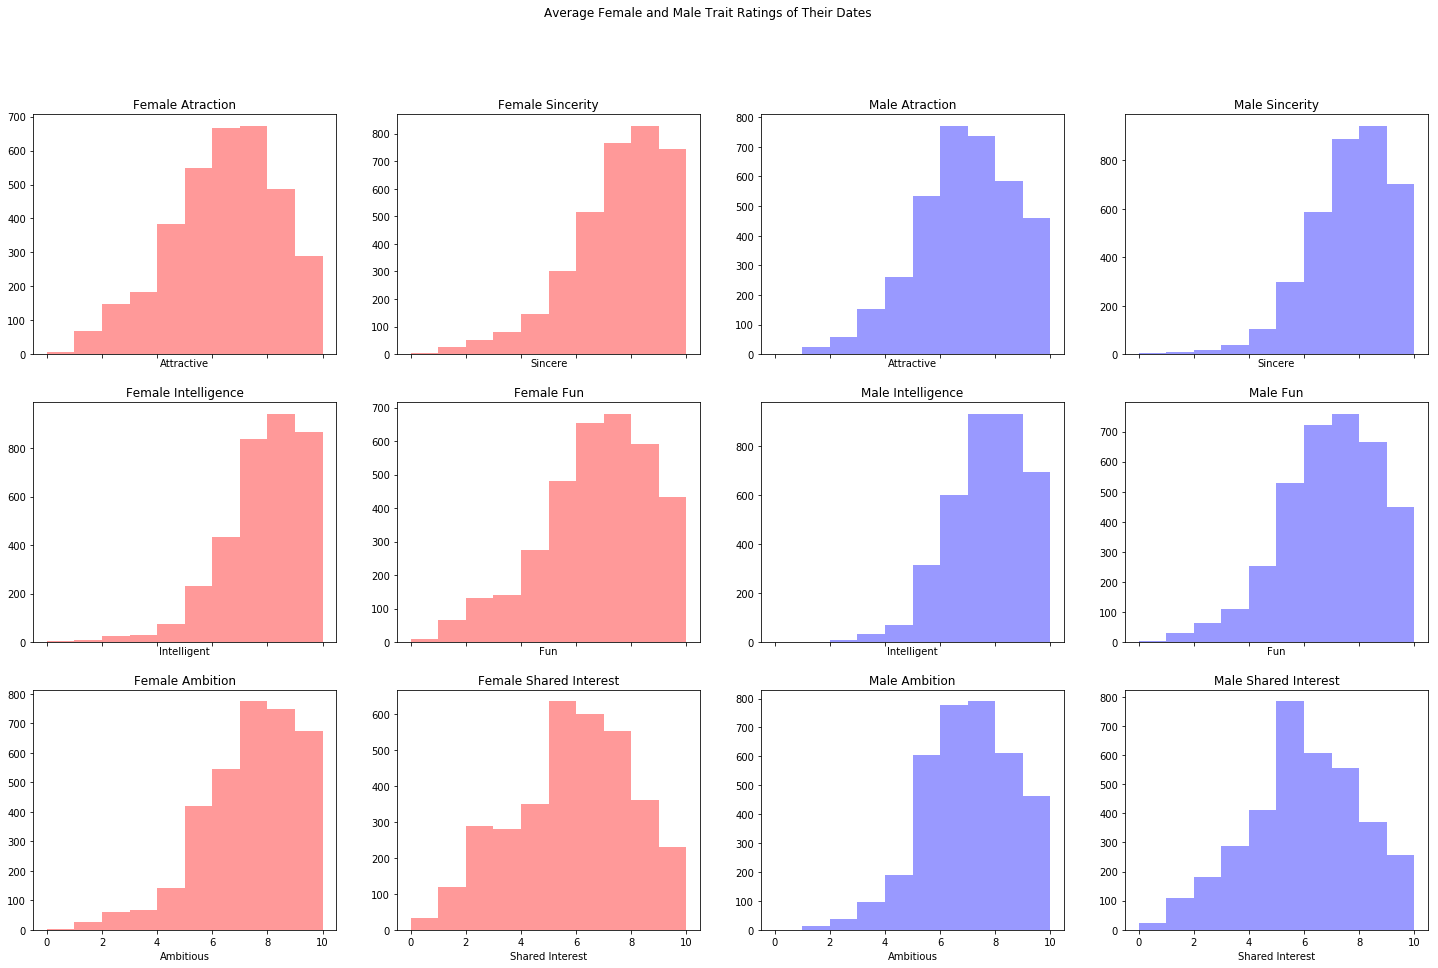

In [7]:
f, axes = plt.subplots(3, 4, figsize=(25,15), sharex=True)
sns.distplot(fsr['Attractive'], bins=10, kde=False, color='r', ax=axes[0,0]).set_title('Female Atraction')
sns.distplot(fsr['Sincere'], bins=10, kde=False, color='r', ax=axes[0,1]).set_title('Female Sincerity')
sns.distplot(fsr['Intelligent'], bins=10, kde=False, color='r', ax=axes[1,0]).set_title('Female Intelligence')
sns.distplot(fsr['Fun'], bins=10, kde=False, color='r', ax=axes[1,1]).set_title('Female Fun')
sns.distplot(fsr['Ambitious'], bins=10, kde=False, color='r', ax=axes[2,0]).set_title('Female Ambition')
sns.distplot(fsr['Shared Interest'], bins=10, kde=False, color='r', ax=axes[2,1]).set_title('Female Shared Interest')
sns.distplot(msr['Attractive'], bins=10, kde=False, color='b', ax=axes[0,2]).set_title('Male Atraction')
sns.distplot(msr['Sincere'], bins=10, kde=False, color='b', ax=axes[0,3]).set_title('Male Sincerity')
sns.distplot(msr['Intelligent'], bins=10, kde=False, color='b', ax=axes[1,2]).set_title('Male Intelligence')
sns.distplot(msr['Fun'], bins=10, kde=False, color='b', ax=axes[1,3]).set_title('Male Fun')
sns.distplot(msr['Ambitious'], bins=10, kde=False, color='b', ax=axes[2,2]).set_title('Male Ambition')
sns.distplot(msr['Shared Interest'], bins=10, kde=False, color='b', ax=axes[2,3]).set_title('Male Shared Interest')
plt.suptitle('Average Female and Male Trait Ratings of Their Dates')
plt.show()


While it is interesting to see some traits have a much more balanced distrubtion of ratings while others have a much more positive skewed distribution of ratings, this doesn't tell us much about this importance of traits. 

## Adding the Decision to Meet Again

In speed dating, the ultimate goal is to get asked out on a second date. Let's visualize the intersection between the average rating a sunject gets from their partner and their average partner's decision to meet. Average decision to meet is represented as a number from 0 to 1. If a person met with 10 partners and had an avergae decision value of 0.6, it would mean that 6 of their 10 partners wanted to meet.

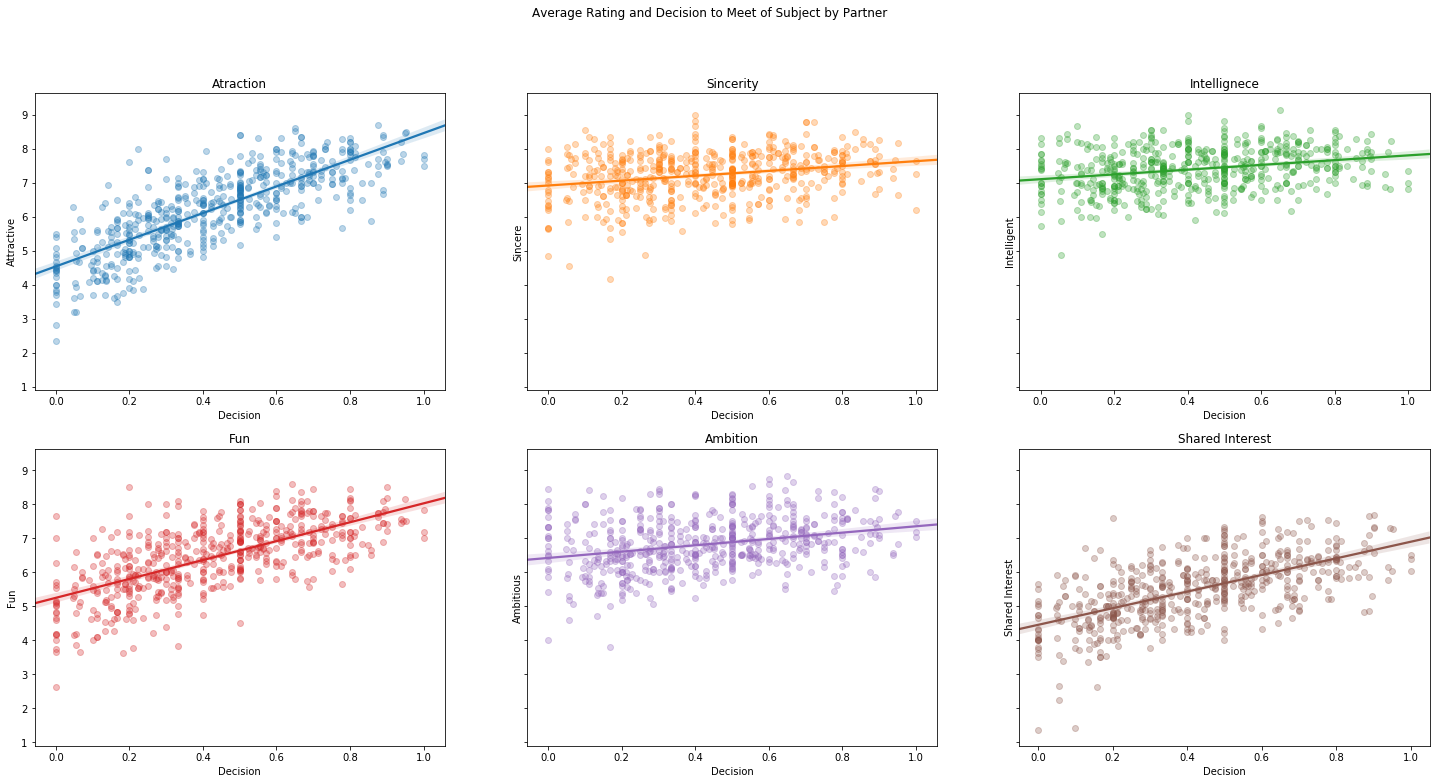

In [8]:
#average partner rating of subject and decision to meet
atpr = dating.groupby('iid')['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','dec_o'].mean()
atpr.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Decision']

fig, axes = plt.subplots(2,3, figsize=(25,12), sharey=True)
sns.regplot(x=atpr['Decision'], y=atpr['Attractive'], scatter_kws={'alpha':0.3}, ax=axes[0,0]).set_title('Atraction')
sns.regplot(x=atpr['Decision'], y=atpr['Sincere'], scatter_kws={'alpha':0.3}, ax=axes[0,1]).set_title('Sincerity')
sns.regplot(x=atpr['Decision'], y=atpr['Intelligent'], scatter_kws={'alpha':0.3}, ax=axes[0,2]).set_title('Intellignece')
sns.regplot(x=atpr['Decision'], y=atpr['Fun'], scatter_kws={'alpha':0.3}, ax=axes[1,0]).set_title('Fun')
sns.regplot(x=atpr['Decision'], y=atpr['Ambitious'], scatter_kws={'alpha':0.3}, ax=axes[1,1]).set_title('Ambition')
sns.regplot(x=atpr['Decision'], y=atpr['Shared Interest'], scatter_kws={'alpha':0.3}, ax=axes[1,2]).set_title('Shared Interest')
plt.suptitle('Average Rating and Decision to Meet of Subject by Partner')
plt.show()

We can see that being rated more attractive makes one much more likely to be asked to meet again. After that, a higher rating of fun and having shared interested also seems to make someone slightly more likely to be asked to meet again. Sincerity, Intelligence, and Ambition seem to have much less impact in the likelyhood to be asked to meet again.

We can look at the exact correlation coefficient as an exact measure of each traits influence.

In [9]:
att_r = np.corrcoef(atpr['Decision'], atpr['Attractive'])[0, 1]
sin_r = np.corrcoef(atpr['Decision'], atpr['Sincere'])[0, 1]
int_r = np.corrcoef(atpr['Decision'], atpr['Intelligent'])[0, 1]
fun_r = np.corrcoef(atpr['Decision'], atpr['Fun'])[0, 1]
amb_r = np.corrcoef(atpr['Decision'], atpr['Ambitious'])[0, 1]
sha_r = np.corrcoef(atpr['Decision'], atpr['Shared Interest'])[0, 1]
print('Correlation between meeting again and trait ratings:\nAttractive: {}'.format(round(att_r,2)))
print('Sincere: {}'.format(round(sin_r,2)))
print('Intelligent: {}'.format(round(int_r,2)))
print('Fun: {}'.format(round(fun_r,2)))
print('Ambitious: {}'.format(round(amb_r,2)))
print('Shared Interest: {}'.format(round(sha_r,2)))

Correlation between meeting again and trait ratings:
Attractive: 0.79
Sincere: 0.25
Intelligent: 0.27
Fun: 0.66
Ambitious: 0.29
Shared Interest: 0.62


So attractiveness defintely seems to be most important, then fun, shared interests, and ambition, intelligence, and sincerity seem to have little impact.

This is interesting, as intelligence was ranked first and second most important by women and men respectively, but it doesn't seem to be one of the least important. Also, shared interest was last and second to last for women and men respectively, but it seems to be one of the more influential traits. 

Even though people say they wanted intelligence, it isn't what they focus on. Can we change how much intelligence rating affects the decision to meet for a second date? 

## Can Environment Affect Romantic Values?

I believe that if we influence the setting where the speed dating is taking place, we can change the amount of influence any particular trait has on the final decision to meet for a second date. We will test for this to see if we can make intelligence a more influencial triat by changing the area the speed dating resturant to something themed around the celebration of intellect, like a library. 


If we host speed dating sessions in a library (or similarly themed area), we will see an increase in the positive influence of the date's intelligence on the decision to meet for a second date.

#### Null Hypothesis: environment does not affect the importance of traits
#### Hypothesis: changing the environment can cause a change in the importance of intelligence

When collecting data and evaluating our experiment, we should be careful to note the possible failings of using self-reported data. We will try to minimize that by primarily looking at the intersecting of a subject's rating of others, as we saw before respondants tended to judge others more realistically than themselves, and a subject's decision to go on a second date, which wouldn't be falsely reported.


## Performing the Experiment

We will get subjects to participate in a speed dating experiment and do our best to split them into groups of equal demographics. One group will be the control and the other will be the test. We can use a sorting algorithm to assist us when splitting them up, paying close attention to gender (of course), race, age, and whatever other demographic data we can get our hands on. 

We can rent out space in a library, holding on the test group in the library and the control group in sparsely decorated area of the library or some other space which can satisfy our needs. If we are worried about having to hold the control and test group in 2 different locations, we can rent out 2 rooms in a conference center or something similar, keeping the control room bare while decorating the test room as a library. We should also be sure to try and keep the furnishings the same amoung both groups. While it would be interesting to test how comfort might affect speed dating, it is not a variable we want to affect our experiment.

From there, we will have our participants fill out a similar survey as in the previous data set. Specifically, they will be asked to rate how much they value each of the 6 traits in a partner. Then, they will be asked to judge how much other people of the same sex value these traits, then the same for others of the opposite sex. After that, they will meet with their first partner for 5 minutes in normal speed dating fashion, after which they will be given 1 minute alone to rate their patner. This process will repeat until they've met and rated all their partners, completing the round.

Since we will need to do many rounds over many days to get a large enough sample size, we should log daily events that occur which may affect our experiment (e.g. weather, traffic)

## Evaluating Our Results

Because our experiment not only focuses on self reported data but is also coming from logical conclusions we can pull from the correlation of our data, it will not be useful to set a confidence level with a traditional p-test. It will be much better to wholiscally compare the two groups after the test is completed.

This experiment has the possibilty of being extremely enlightening. While we are primary focusing on causing a change in the intelligence rating, we are also going to be gathering just as much data on the other 5 traits. So we can monitor any difference between the importance of other traits between groups to see if their were any unexpected occurances.

Our experiment will probably not be stringent enough to be published or seriously prove causation because it so heavily relies on self-reported data. It will however still be a valuable study for any speed dating company or any business looking to affect it's customers behavior or thought patterns with their decor. It will also be very interesting from a social science perspective as it will further illuminate how environment may change human behavior.

Data Source: https://www.kaggle.com/annavictoria/speed-dating-experiment